# Results
In this notebook we will learn the following about the Results class returned a Benchmark evaluation:
1. **Result Creation**: How to create Results from a Benchmark and Learners.
2. **Result Plotting**: How to create plots of the learners that were evaluted by a benchmark
3. **Result Saving/Loading**: How to save and load results to and from disk
4. **Result to Pandas**: How to turn Result into a collection of Pandas dataframes for more in-depth analysis
5. **Result Filtering**: How to use filtering to create custom plots from a large experiment result

## Result Creation

**Results** are created whenever Learners are evaluated on a Benchmark. Below is a simple example of this:

In [1]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

result = Benchmark([ValidationSimulation(1000)]).evaluate([RandomLearner(), VowpalLearner(epsilon=0.1)])

2021-10-02 18:21:16 Processing chunk...
2021-10-02 18:21:16   * Creating source 0 from Validation... (0.0 seconds) (completed)
2021-10-02 18:21:16   * Creating simulation 0 from source 0... (0.0 seconds) (completed)
2021-10-02 18:21:16   * Calculating Simulation 0 statistics... (0.06 seconds) (completed)
2021-10-02 18:21:16   * Evaluating learner 0 on Simulation 0... (0.07 seconds) (completed)
2021-10-02 18:21:17   * Evaluating learner 1 on Simulation 0... (0.74 seconds) (completed)


## Result Plotting

The **Result** class is capable of creating two separate plots: 1) `plot_learners` and `plot_shuffles`. 

### Plot Learners
Perhaps the most straightforward question after running a Benchmark is asking which Learners performed best.

To answer this question the **Result** has a `plot_learners` method.

2021-10-02 18:21:17 Processing chunk...
2021-10-02 18:21:17   * Creating source 0 from Validation... (0.0 seconds) (completed)
2021-10-02 18:21:17   * Creating simulation 0 from source 0... (0.0 seconds) (completed)
2021-10-02 18:21:17   * Calculating Simulation 0 statistics... (0.06 seconds) (completed)
2021-10-02 18:21:17   * Evaluating learner 0 on Simulation 0... (0.06 seconds) (completed)
2021-10-02 18:21:18   * Evaluating learner 1 on Simulation 0... (0.72 seconds) (completed)
2021-10-02 18:21:18   * Creating simulation 1 from source 0... (0.01 seconds) (completed)
2021-10-02 18:21:18   * Calculating Simulation 1 statistics... (0.05 seconds) (completed)
2021-10-02 18:21:18   * Evaluating learner 0 on Simulation 1... (0.06 seconds) (completed)
2021-10-02 18:21:19   * Evaluating learner 1 on Simulation 1... (0.71 seconds) (completed)
2021-10-02 18:21:19   * Creating simulation 2 from source 0... (0.0 seconds) (completed)
2021-10-02 18:21:19   * Calculating Simulation 2 statistics..

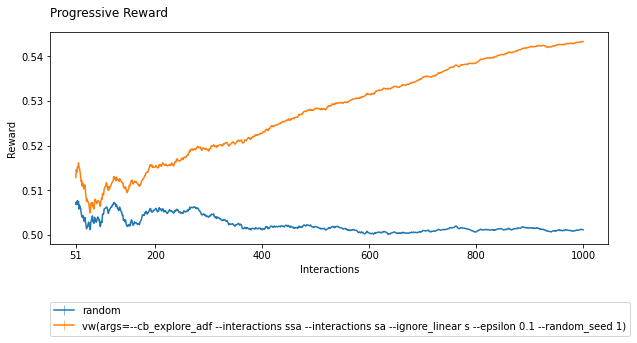

In [2]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

result = Benchmark([ValidationSimulation(1000)], shuffle=[1,2,3,4]).evaluate([RandomLearner(), VowpalLearner(epsilon=0.1)])

result.plot_learners()

The `plot_learners` method has many arguments which allow customization of the plot.
```
Args:
    xlim: Define the x-axis limits to plot. If `None` the x-axis limits will be inferred.
    ylim: Define the y-axis limits to plot. If `None` the y-axis limits will be inferred.
    span: In general this indicates how many previous evaluations to average together. In practice this works
        identically to ewm span value in the Pandas API. Additionally, if span equals None then all previous 
        rewards are averaged together vs span = 1 WHERE the instantaneous reward is plotted for each interaction.
    err: Determine what kind of error bars to plot (if any). Valid types are `None`, 'se', and 'sd'. If `None`
        then no bars are plotted, if 'se' the standard error is shown, and if 'sd' the standard deviation is shown.
    each: Determine whether each constituent observation used to estimate mean performance is also plotted.
    ax: Provide an optional axes that the plot will be drawn to. If not provided a new figure/axes is created.
```

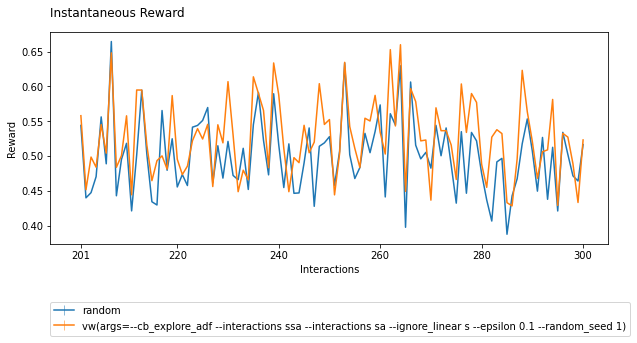

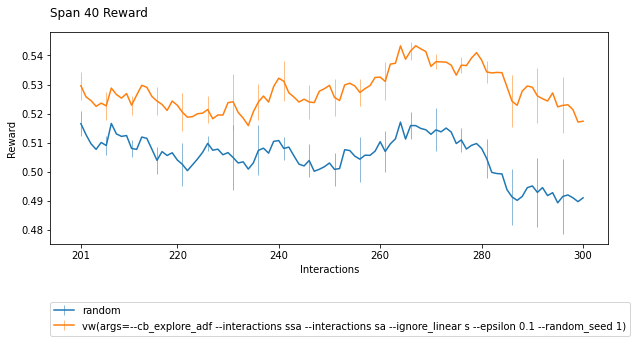

In [3]:
result.plot_learners(xlim=(200,300), span=1 , err=None)
result.plot_learners(xlim=(200,300), span=40, err='se')